In [16]:

import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.visualization import simple_norm
import astropy.units as u
import ccdproc

from lvmdrp.utils.examples import get_frames_metadata
from lvmdrp.utils.examples import get_masters_metadata

plt.style.use("seaborn-v0_8-talk")

In [4]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = "./data"
os.makedirs(output_path, exist_ok=True)

# create processed frames path template
out_main_path = os.path.join(output_path, "lvm-{kind}-{camera}-{expnum}.fits")
out_calib_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{exptime}.fits")

In [6]:
raws_table = get_frames_metadata(path=os.path.join(data_path, "lco_com"), ignore_cache=False).to_pandas()
masters_table = get_masters_metadata(path_pattern=out_calib_path)

[INFO]: loading cached metadata from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/frames_table.pkl'


In [10]:
bias_analogs = raws_table.query("imagetyp=='bias' & mjd==60039")
dark_analogs = raws_table.query("imagetyp=='dark' & mjd==60039")

data = CCDData.read(bias_analogs.path.iloc[0], unit="adu")

In [20]:
new_data = ccdproc.create_deviation(data, readnoise=data.header["RDNOISE1"] * u.electron, gain=data.header["GAIN1"] * u.electron / u.adu)

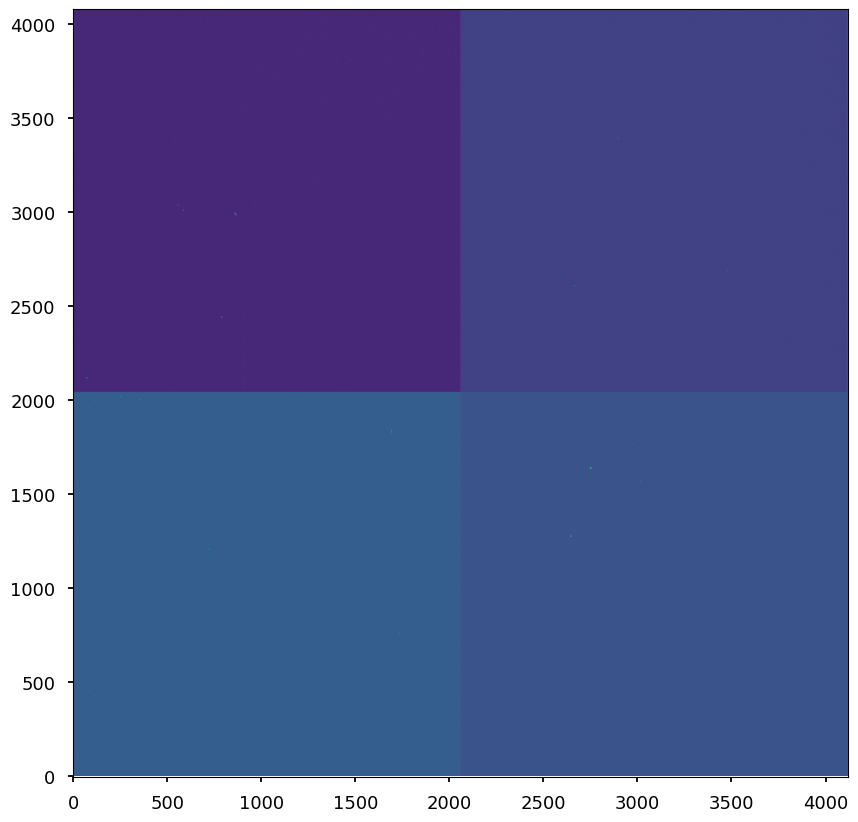

In [27]:
norm = simple_norm(data.data, stretch="log", clip=True)
plt.figure(figsize=(10,10))
plt.imshow(data.data, origin="lower", norm=norm)

In [37]:
mask = ccdproc.ccdmask(data)

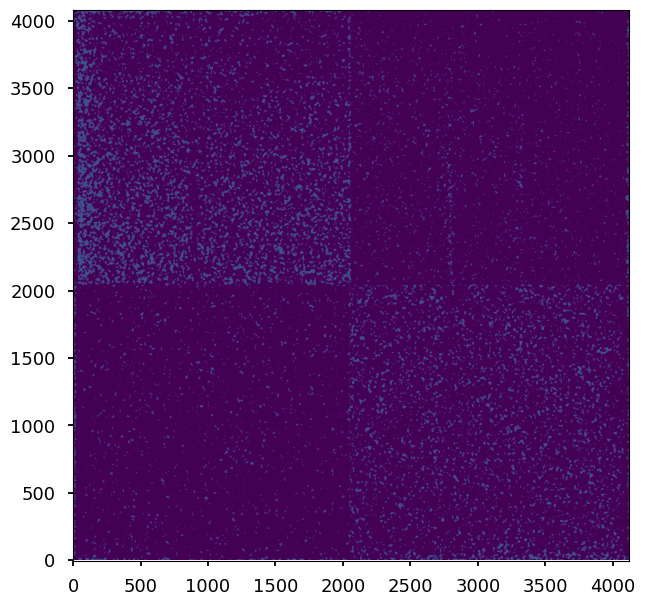

In [38]:
plt.imshow(mask, origin="lower")